In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [2]:
from scipy.io import arff
import urllib.request
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Source: https://archive.ics.uci.edu/ml/datasets/Caesarian+Section+Classification+Dataset


Goal: Create a DNN that predicts whether a mother giving birth should have a Caesarian Section

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00472/caesarian.csv.arff'
ftpstream = urllib.request.urlopen(url)
data, meta = arff.loadarff(io.StringIO(ftpstream.read().decode('utf-8')))
data = pd.DataFrame(data)

In [4]:
data.head()

,Age,Delivery number,Delivery time,Blood of Pressure,Heart Problem,Caesarian
0,b'22',b'1',b'0',b'2',b'0',b'0'
1,b'26',b'2',b'0',b'1',b'0',b'1'
2,b'26',b'2',b'1',b'1',b'0',b'0'
3,b'28',b'1',b'0',b'2',b'0',b'0'
4,b'22',b'2',b'0',b'1',b'0',b'1'


In [5]:
data = data.astype(int)

In [6]:
train_dataset = data.sample(frac=0.75, random_state=0)
test_dataset = data.drop(train_dataset.index)

In [7]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Caesarian')
test_labels = test_features.pop('Caesarian')

In [8]:
labs= ['Age','Delivery number','Delivery time','Blood of Pressure','Heart Problem']

In [9]:
x_feat = np.array(train_features[labs])
n = len(labs)

In [10]:
norm = preprocessing.Normalization(input_shape=[n,])
norm.adapt(x_feat)

In [11]:
reg_model = tf.keras.Sequential([
    norm,
    layers.Dropout(0.3),
    layers.Dense(units=256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(units=256, activation='relu'),
    layers.Dense(units=1, activation='sigmoid')
])

In [12]:
reg_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [13]:
%%time
history = reg_model.fit(
    np.array(train_features[labs]), train_labels,
    epochs=1000,
    verbose=0,
    validation_split=0.3)

Wall time: 41.2 s


In [14]:
def plot_acc(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Error [y]')
  plt.legend()
  plt.grid(True)

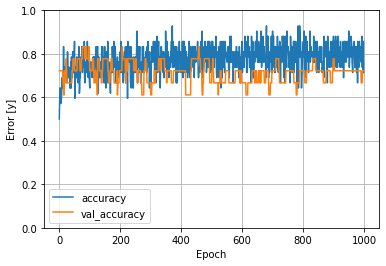

In [15]:
plot_acc(history)

In [16]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
995,0.478550,0.738095,0.521056,0.722222,995
996,0.386796,0.833333,0.523013,0.722222,996
997,0.578390,0.714286,0.526486,0.722222,997
998,0.418300,0.857143,0.528341,0.722222,998
999,0.519835,0.714286,0.537734,0.722222,999


In [17]:
demo = test_dataset.sample(frac=1).reset_index(drop=True)

In [18]:
demo['pred'] = reg_model.predict(test_features)
demo['pred'] = round(demo['pred']).astype(int)

In [19]:
demo

,Age,Delivery number,Delivery time,Blood of Pressure,Heart Problem,Caesarian,pred
0,28,2,0,1,0,0,0
1,31,1,2,2,1,0,0
2,38,3,2,2,1,1,0
3,36,4,0,2,1,1,1
4,29,2,0,1,1,0,0
5,32,2,0,2,1,1,1
6,31,2,2,1,0,0,1
7,20,1,0,1,1,0,0
8,17,1,0,0,0,1,0
9,26,1,2,0,1,1,1
